## КМ-3


1) Исследуйте положение корней функции, которую я написал для Вас:

    import scipy.special as sp

    def cn(x, m, v):

        return sp.ellipj(x, m)[1]+v

    Здесь x – пространственная координата, m, v – параметры.

    Исследование можно провести, нарисовав контурную карту (линии уровня. Значения 0<=x<=10 0<=v= 0.8. Исследование проведите для m=0.3, 0.6, 0.9. Как при этом будет меняться местоположение нулей.

2) Для функции сndn из первого пункта и m=0.8 с помощью любой процедуры решения уравнений постройте зависимость положения одного из корней уравнения от v. Нарисуйте график

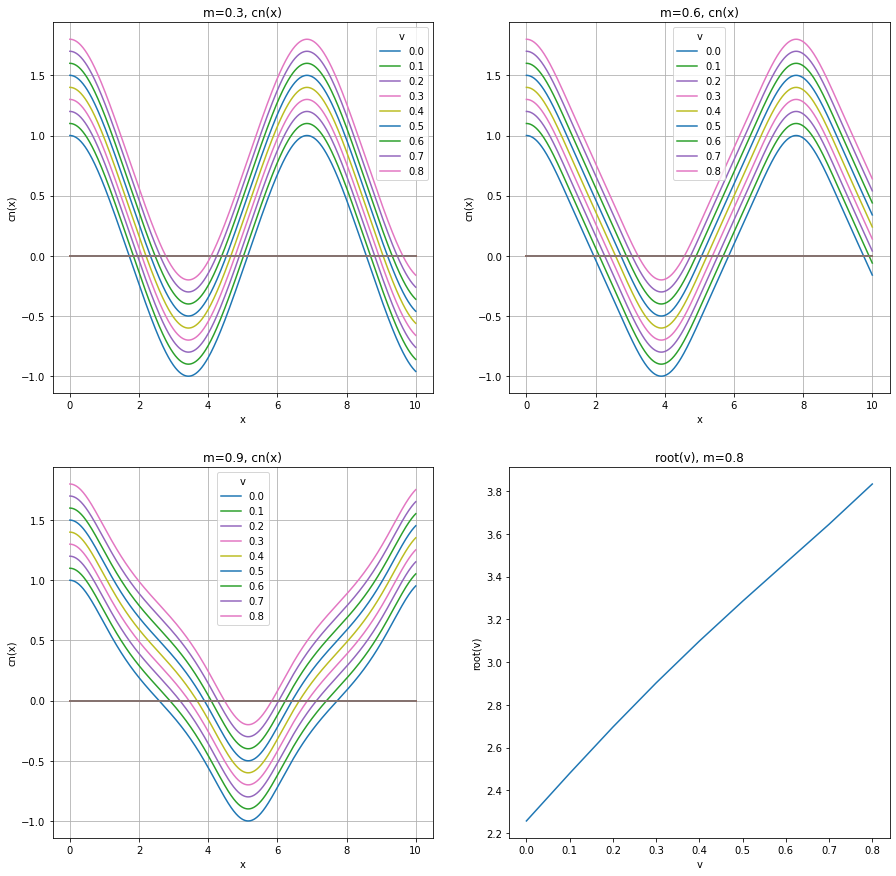

In [13]:
import scipy.special as sp
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from numpy import linspace


def cn(x, m, v):
    return sp.ellipj(x, m)[1] + v


def main():
    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(2, 2, 1)
    ax1.set(title='m=0.3, cn(x)')
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.set(title='m=0.6, cn(x)')
    ax3 = fig.add_subplot(2, 2, 3)
    ax3.set(title='m=0.9, cn(x)')
    for ax in (ax1, ax2, ax3):
        ax.set_xlabel('x')
        ax.set_ylabel('cn(x)')
        ax.grid()
    ax4 = fig.add_subplot(2, 2, 4)
    ax4.set(title='root(v), m=0.8')
    ax4.set_xlabel('v')
    ax4.set_ylabel('root(v)')

    x = [i for i in linspace(0, 10, 1000)]
    v = [i for i in linspace(0, 0.8, 9)]
    y0 = [0 for i in range(len(x))]
    for vv in v: 
        y1 = [cn(xx, 0.3, vv) for xx in x]
        y2 = [cn(xx, 0.6, vv) for xx in x]
        y3 = [cn(xx, 0.9, vv) for xx in x]
        vv = round(vv, 1)
        for ax, yy in zip((ax1, ax2, ax3), (y1, y2, y3)):
            ax.plot(x, yy, label=vv)
            ax.plot(x, y0)
            ax.legend(title='v')
    m = 0.8
    y4 = [fsolve(cn, 3, args=(m, vv)) for vv in v]
    ax4.plot(v, y4)
    plt.show()


main()